# DeepBLU-Z model testing

Here we will import some fish images and use them to test our trained DeepBLU-Z models.

The hdf5 dataset images_ds.h5 contains 59,835 labeled
images and 2388 unlabeled images for verifying models after training for a total of 62223 images. The
2388 unlabeled images are not used during training and are intended for post-hoc validation like this.

First, let's read in some images and look at the data:

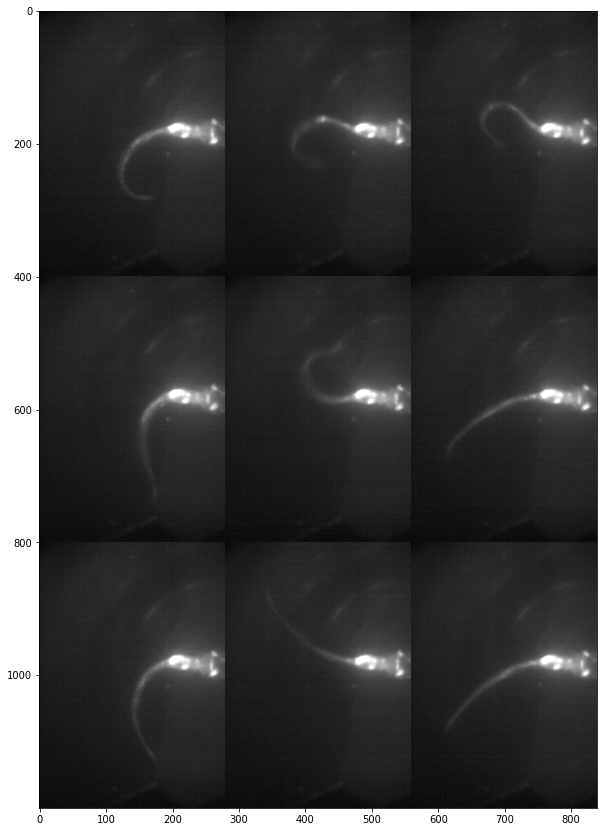

In [70]:
# Import database of images
import h5py
hdf_path = '../data/training_data/images_ds.h5'
# hdf_path = '/home/userman/Documents/aws/danionella_training_data/images_ds.h5'
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

# Pull out nine random images from set held out during training and display
import numpy as np
unlabeled_indices = np.linspace(59836, 62223, 62223-59835, dtype=int)
# unlabeled_indices = np.linspace(0, 499, 500, dtype=int)

import random
image_indices = random.sample(list(unlabeled_indices), 9)
image_indices.sort()

import matplotlib.pyplot as plt
from skimage.util import montage

images = images[image_indices[:], :, :]
images = np.transpose(images, (0, 2, 1))

plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(images), cmap='gray')

Now let's run these images through one of our models for pose estimation and display the results:

In [71]:
from PIL import Image

tracked_images = images
for im_num in range(images.shape[0]):
    image = Image.fromarray(images[im_num, :, :])
    image.save('../data/test_data/temp.tif')
    # ! python3 ../main.py -m predict --load ../models/old/resnet18_50epochs.tar -t ../data/test_data/temp.tif
    ! python3 ../main.py -m predict --load ../models/090920/resnet18_50e2x/resnet18 -t ../data/test_data/temp.tif
    tracked_images[im_num, :, :] = Image.open('../data/test_data/temp_tracked.tif')

GPU enabled
2020-09-10 15:39:56,348:INFO: Start with arguments Namespace(backbone='resnet18', batch_size=16, datapath=PosixPath('data/training_data'), epochs=50, load='../models/090920/resnet18_50e2x/resnet18', lr=0.01, lr_decay=0.001, lr_decay_step=5, mode='predict', num_pts=8, retrain=False, save=None, seed=481084639, shuffle=True, target='../data/test_data/temp.tif', transform=False, val_split=0.2)
2020-09-10 15:39:58,121:INFO: Loading model from ../models/090920/resnet18_50e2x/resnet18
2020-09-10 15:39:58,122:INFO: Model:
Model(
  (features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

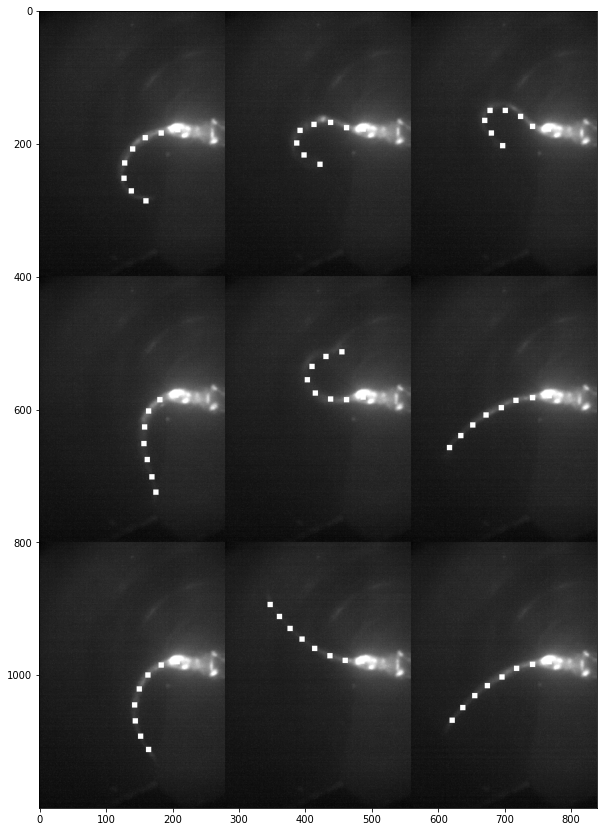

In [72]:
plt.rcParams["figure.figsize"] = (10,20)
plt.imshow(montage(tracked_images), cmap='gray')

Test running on stack

In [104]:
#Import database of images
import numpy as np
import h5py
hdf_path = '../data/training_data/images_ds.h5'
# hdf_path = '/home/userman/Documents/aws/danionella_training_data/images_ds.h5'
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

stack = np.uint8(images[50000:50500, :,  :])
stack = np.transpose(stack, (0, 2, 1))

import imageio

imageio.mimwrite('../data/test_data/test_stack4.tiff', stack)

In [107]:
%%capture

! python3 ../main.py -m predict --load ../models/090920/resnet18_50e2x/resnet18 -t ../data/test_data/image16.tif